## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [486]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [487]:
print(X.isnull().sum(), "\n")
print(X.dtypes.value_counts())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64 

float64    13
dtype: int64


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [488]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [489]:
def find_classifier(n, X_train, y_train):
    return KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)


def find_accuracy_train(classifier, X_train, y_train):
    y_predicted_train = classifier.predict(X_train)
    return accuracy_score(y_train, y_predicted_train)


def find_accuracy_test(classifier, X_train, y_train, X_test):
    y_predicted_test = classifier.predict(X_test)
    return accuracy_score(y_test, y_predicted_test)


X_train = X_train[['alcohol','magnesium']]
X_test = X_test[['alcohol','magnesium']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Евклидова метрика (p = 2) стоит по дефолту

array_test = []
array_train = []

indexes = [1, 3, 5, 10, 15, 25]

for i in indexes:
    array_train.append(float('{:.2f}'.format(find_accuracy_train(find_classifier(i, X_train, y_train), X_train, y_train))))
    array_test.append(float('{:.2f}'.format(find_accuracy_test(find_classifier(i, X_train, y_train), X_train, y_train, X_test))))

df = pd.DataFrame(
              {"test" : array_test,
               "train" : array_train},
                index = indexes)

array_class = [KNeighborsClassifier(n_neighbors=i) for i in indexes]

print(df)

    test  train
1   0.67   1.00
3   0.78   0.81
5   0.72   0.75
10  0.78   0.73
15  0.80   0.73
25  0.80   0.67


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [490]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [491]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

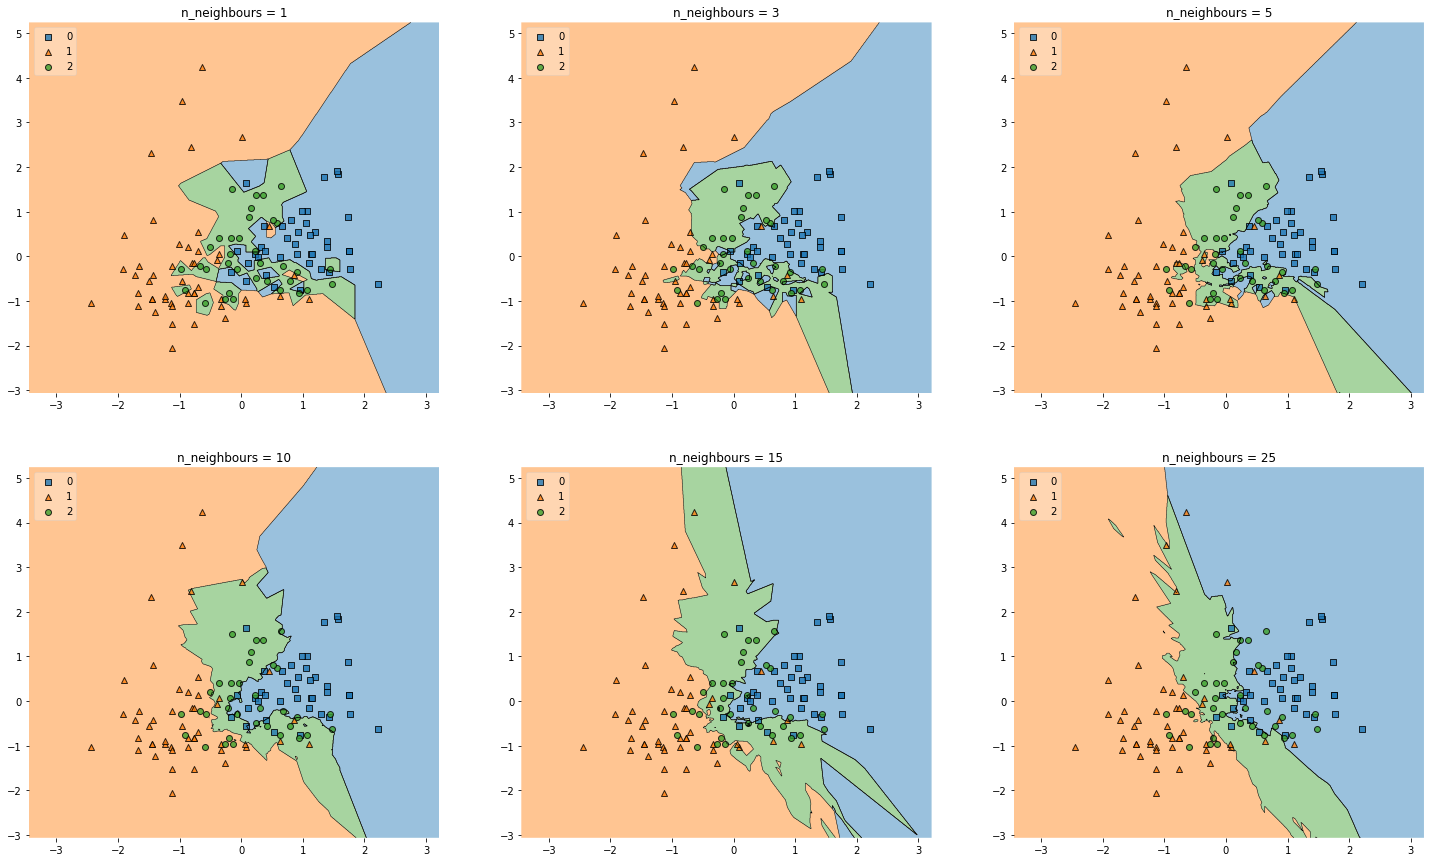

In [492]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(25,15))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']

for clf, lab, grd in zip(array_class,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.


In [493]:
"""
Accuracy тренировочной выборки из 1.3 была визуализирована с помощью графиков в задании 1.5 
(что можно понять, увидев 100% совпадение для первого графика, чья accuracy = 1.0)
Из задания 1.3 понятно, что лучше всего для обучения классификатора использовать 15 или 25 соседей, 
так как тестовая выборка показала наилучший результат. Но если расмматривать геометрию данных для тренировочной выборки (
что показано в задании 1.5), то мы увидим, что, начиная с 15 соседей происходит сильное переобучение модели, 
поэтому целесообразно использовать менее точные выборки с более похожей на оригинал (оригинал = "n_neighbours = 1" рисунок из 1.5)
решающей поверхностью, то есть n = 3 или n = 5.
"""

'\nAccuracy тренировочной выборки из 1.3 была визуализирована с помощью графиков в задании 1.5 \n(что можно понять, увидев 100% совпадение для первого графика, чья accuracy = 1.0)\nИз задания 1.3 понятно, что лучше всего для обучения классификатора использовать 15 или 25 соседей, \nтак как тестовая выборка показала наилучший результат. Но если расмматривать геометрию данных для тренировочной выборки (\nчто показано в задании 1.5), то мы увидим, что, начиная с 15 соседей происходит сильное переобучение модели, \nпоэтому целесообразно использовать менее точные выборки с более похожей на оригинал (оригинал = "n_neighbours = 1" рисунок из 1.5)\nрешающей поверхностью, то есть n = 3 или n = 5.\n'

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

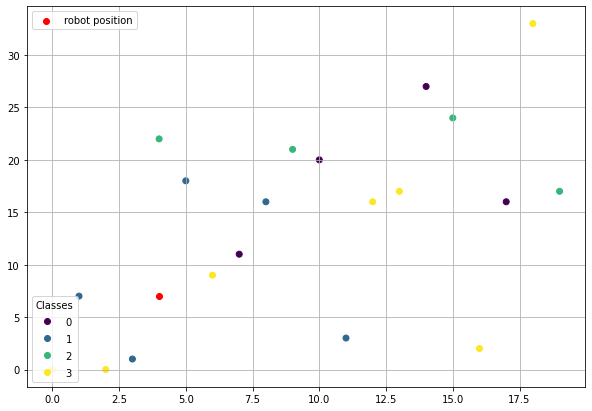

In [494]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [495]:
from sklearn.neighbors import KNeighborsClassifier

In [496]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors = k).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        current_position = self.trajectory[np.r_[len(self.trajectory)-1:len(self.trajectory)]]

        if np.random.binomial(1, 0.2): 
             mapping_direction = 0
        else:   
             mapping_direction = int(self.knn.predict(current_position))
                
        next_position = current_position[0] + self.mapping[mapping_direction]
        self.trajectory = np.vstack([self.trajectory, next_position])

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [497]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

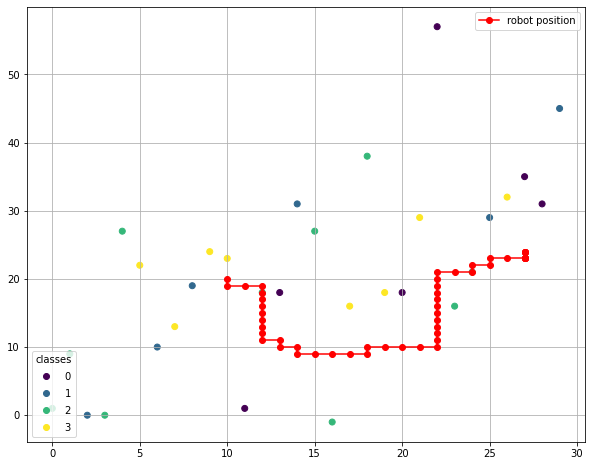

In [498]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

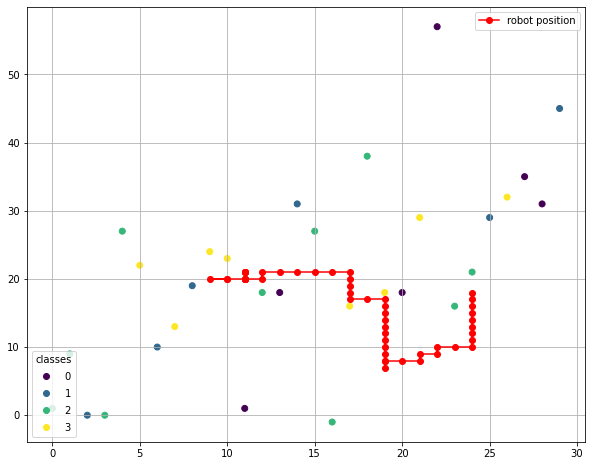

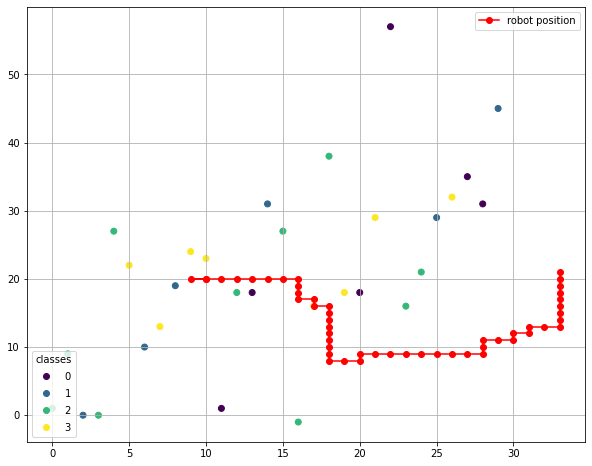

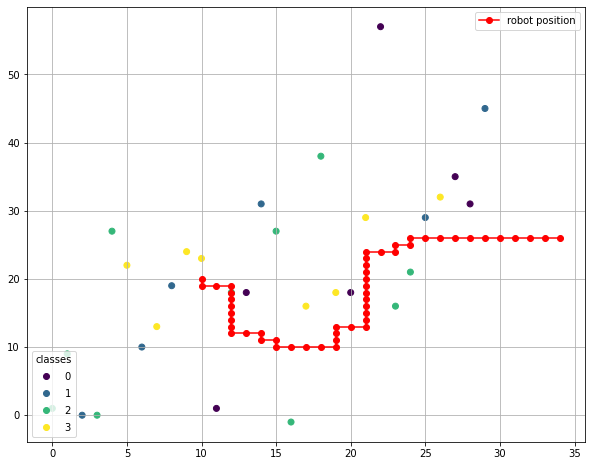

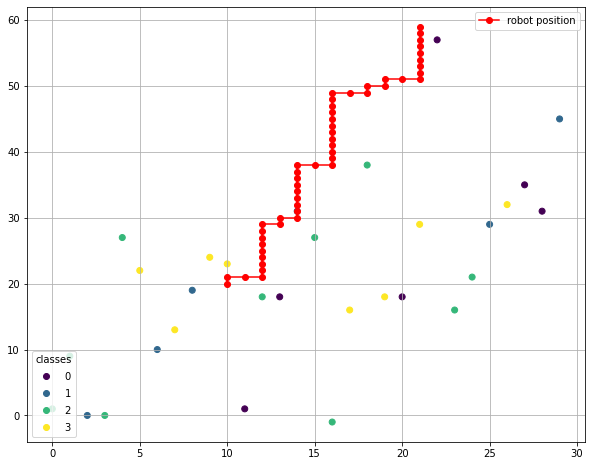

In [499]:
for i in [1, 3, 9, 27]:
    conduct_experiment(x, mean = 3, std = 10, k = i, n_movements = 50)

In [500]:
"""
В целом, так как робот с 20% вероятностью перемещается направо, то движение робота постепенно смещается вправо при любых k.
На робота влияют в 80% самые часто встречающиеся соседи (среди k ближайших штук).
При больших n, в 80% случаев робот будет идти по пути, которому соответствует наибольшее число одинаковых меток среди всех данных.
При минимальном числе соседей, в тех 80% движение робота будет зависеть только от одного соседа, 
пока робот по мере движения не найдет другого более близкого.

Таким образом, осмысленно назначив метки, мы сможем направлять робота.
"""

'\nВ целом, так как робот с 20% вероятностью перемещается направо, то движение робота постепенно смещается вправо при любых k.\nНа робота влияют в 80% самые часто встречающиеся соседи (среди k ближайших штук).\nПри больших n, в 80% случаев робот будет идти по пути, которому соответствует наибольшее число одинаковых меток среди всех данных.\nПри минимальном числе соседей, в тех 80% движение робота будет зависеть только от одного соседа, \nпока робот по мере движения не найдет другого более близкого.\n\nТаким образом, осмысленно назначив метки, мы сможем направлять робота.\n'

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [501]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [502]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [503]:
data = data.drop('Unnamed: 0', 1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [504]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [505]:
""" 
=> коррелируют больше всего carat, x, y, z
"""

' \n=> коррелируют больше всего carat, x, y, z\n'

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [506]:
from sklearn.preprocessing import OneHotEncoder
data = pd.get_dummies(data)
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [507]:
np.random.seed(0)
X = data.drop('price', 1) 
y = data['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [508]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [509]:
# from https://nagornyy.me/courses/data-science/regression/ 

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

from sklearn.metrics import mean_squared_error

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 1284785.993, test: 1258892.618


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [510]:
data.dtypes

carat            float64
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut_Fair           uint8
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_D            uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_I1         uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [511]:
array = np.array(slr.coef_)
array_X = list(X)
for i in range(len(array)):
    print(array_X[i], "=", array[i])

carat = 5276.201465373558
depth = -90.48916425241691
table = -66.90071175853377
x = -1046.0941774461958
y = 0.7288357334934707
z = -46.21147194047901
cut_Fair = -2948327217904857.0
cut_Good = -4983410840485588.0
cut_Ideal = -8482809124932583.0
cut_Premium = -7541559287517700.0
cut_Very Good = -7213805758337265.0
color_D = -912800081884586.1
color_E = -1058641685534546.0
color_F = -1054891880955699.2
color_G = -1114288201424901.8
color_H = -988775824674313.0
color_I = -828495722003120.4
color_J = -607134996589059.5
clarity_I1 = -193365742790313.7
clarity_IF = -293731353529249.8
clarity_SI1 = -701261981858522.0
clarity_SI2 = -615370824775913.9
clarity_VS1 = -584424317988361.4
clarity_VS2 = -685765295641881.1
clarity_VVS1 = -411614138465380.6
clarity_VVS2 = -477320885130597.3


In [512]:
"""
Из всех вещественных переменных carat и x на порядок превышают оценки прочих.
"""

'\nИз всех вещественных переменных carat и x на порядок превышают оценки прочих.\n'

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [513]:
from sklearn.linear_model import Lasso, Ridge

np.random.seed(0)

# Lasso

clf = Lasso(alpha=10.0)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Lasso MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

arrayLasso = np.array(clf.coef_)
for i in range(6):
    print(array_X[i], "=", arrayLasso[i])
    
# Ridge

clf = Ridge(alpha=10.0)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Ridge MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

arrayRidge = np.array(clf.coef_)
for i in range(6):
    print(array_X[i], "=", arrayRidge[i])
    
    
# INITIALLY
#  MSE train: 1284785.993, test: 1258892.618
#  coef_: 
#   carat = 5276.201465373558
#   depth = -90.48916425241691
#   table = -66.90071175853377
#   x = -1046.0941774461958
#   y = 0.7288357334934707
#   z = -46.21147194047901

Lasso MSE train: 1295725.252, test: 1278678.228
carat = 4817.915546007354
depth = -61.32936091070203
table = -52.85103514506725
x = -603.8288752494558
y = -0.0
z = -49.86198106772959
Ridge MSE train: 1284723.584, test: 1259946.892
carat = 5241.7431160487
depth = -91.79815462068407
table = -65.353752079982
x = -1008.6854536372907
y = -4.878162973889239
z = -44.356993668483135


In [514]:
"""
В целом, MSE не изменилась, а веса уменьшились, в целом незначительно, но в отдельных случаях наблюдается уменьшение почти в 2 раза. 
Так как веса, в целом, уменьшились незначительно, проблема мультиколлинеарности в изначальной регрессии проявляла себя тоже незначительно.
"""

'\nВ целом, MSE не изменилась, а веса уменьшились, в целом незначительно, но в отдельных случаях наблюдается уменьшение почти в 2 раза. \nТак как веса, в целом, уменьшились незначительно, проблема мультиколлинеарности в изначальной регрессии проявляла себя тоже незначительно.\n'

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254169305.86193848, tolerance: 60080607.47091246
  model = cd_fast.enet_coordinate_descent(


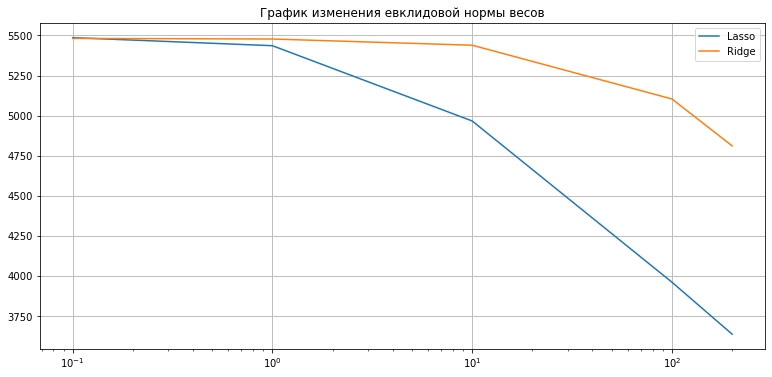

In [515]:
Lasso_array = []
Ridge_array = []
indexes = [0.1, 1.0, 10.0, 100.0, 200.0]

for i in indexes:
    Lasso_array.append(np.linalg.norm(Lasso(alpha=i).fit(X_train, y_train).coef_))
    Ridge_array.append(np.linalg.norm(Ridge(alpha=i).fit(X_train, y_train).coef_))

plt.figure(figsize=(13, 6))
plt.semilogx(indexes, Lasso_array, label="Lasso")
plt.semilogx(indexes, Ridge_array, label="Ridge")
plt.title("График изменения евклидовой нормы весов")
plt.legend()
plt.grid(True)

In [516]:
"""
Lasso метод агрессивнее уменьшает веса, что видно из графика. Ее часто используют для отбора признаков, потому что она обращает
в ноль именно те признаки, чья предсказательная способность низкая.
Если посмотреть на задание 3.9, то регрессия Lasso наглядно показала, что y признак из модели можно удалить, тогда как в Ridge
регрессии его вес увеличился.
"""

'\nLasso метод агрессивнее уменьшает веса, что видно из графика. Ее часто используют для отбора признаков, потому что она обращает\nв ноль именно те признаки, чья предсказательная способность низкая.\nЕсли посмотреть на задание 3.9, то регрессия Lasso наглядно показала, что y признак из модели можно удалить, тогда как в Ridge\nрегрессии его вес увеличился.\n'

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [517]:
from sklearn.linear_model import LassoCV

result = LassoCV(cv=5, alphas=indexes).fit(X_train, y_train)
print("Сравним:", result.alphas_, "и", result)
print("Следовательно, данные в обратном порядке.")
print("Усредненные ошибки:", np.mean(result.mse_path_, axis = 1))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1118783727.2086067, tolerance: 48309472.87280813
  model = cd_fast.enet_coordinate_descent_gram(


Сравним: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01] и LassoCV(alphas=[0.1, 1.0, 10.0, 100.0, 200.0], cv=5)
Следовательно, данные в обратном порядке.
Усредненные ошибки: [1952265.04978825 1534925.67922293 1298450.19256702 1287786.41354138
 1292981.84091567]


In [518]:
"""
Следовательно, наибольшее качество дает 𝛼 = 1.0
"""

'\nСледовательно, наибольшее качество дает 𝛼 = 1.0\n'

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [525]:
np.random.seed(0)

# Lasso

clf = Lasso(alpha=1.0)
clf.fit(X_train, y_train)

arrayLasso = np.array(clf.coef_)
for i in range(len(array_X)):
    print(array_X[i], "=", arrayLasso[i])

carat = 5232.4749638737785
depth = -90.96476067861853
table = -64.26959408808462
x = -1006.9460168656165
y = -0.6103044342595818
z = -41.940942774188876
cut_Fair = -122.43206144488153
cut_Good = -50.864945317793826
cut_Ideal = 37.23607867344713
cut_Premium = 0.0
cut_Very Good = -8.099218228499145
color_D = 148.23731267806863
color_E = 102.67316314116387
color_F = 80.55237174602166
color_G = -0.0
color_H = -176.47326731280344
color_I = -293.373354652056
color_J = -416.555269058943
clarity_I1 = -503.6837566301552
clarity_IF = 189.86543199527839
clarity_SI1 = -258.26528811464374
clarity_SI2 = -589.9118752889262
clarity_VS1 = 112.97975370443233
clarity_VS2 = -0.0
clarity_VVS1 = 187.96548626201215
clarity_VVS2 = 198.2673743465264


In [ ]:
"""
Неинформативные: cut_Premium, color_G, clarity_VS2
Наиболее информативные: carat, x, clarity_SI2
Возможное смысловое объяснение: 
    Очевидно, что на цену влияет число карат бриллиантов, также их размеры (а наиболее значимый - длина (признак x))
    Интересно, что не самая дорогая чистота SI2 выбилась в лидеры. Возможно, из-за своей распространенности в выборке.
    Неинформативные являются таковыми, так как слишком редко встречались в тренировочной выборке.
"""

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [528]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Lasso MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

# from 3.7 MSE train: 1284785.993, test: 1258892.618

Lasso MSE train: 1284771.188, test: 1260161.249


In [ ]:
"""
MSE Lasso-регресии дала результат больше скорее всего по тому, что мультиколлинеарность выражена слабо (что было показано в 3.9).
Следовательно, в данном случае лучше использовать модель обычной линейной регрессии.
"""